<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/Lecture_2_4_1_%D0%9A%D0%BB%D0%B0%D1%81%D0%B8%D1%84%D1%96%D0%BA%D0%B0%D1%82%D0%BE%D1%80_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLXtrend - допоміжна бібліотека для задач машинного навчання. Ми будемо її використовувати для візуалізацій decision boundaries.

Більше про ї використання [тут](https://towardsdatascience.com/mlxtend-a-python-library-with-interesting-tools-for-data-science-tasks-d54c723f89cd).

In [1]:
!pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Імпорт даних

In [3]:
!pip install gdown


In [4]:
import gdown
import pandas as pd

file_id = '12novdCu0R20Q-8j3ZwRfddQ5bcCbW8aH'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'temp.csv', quiet=False)
df = pd.read_csv('temp.csv')


Downloading...
From: https://drive.google.com/uc?id=12novdCu0R20Q-8j3ZwRfddQ5bcCbW8aH
To: /content/temp.csv
100%|██████████| 23.1k/23.1k [00:00<00:00, 9.95MB/s]


In [5]:
#df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Вибір ознак (Feature Selection)

In [6]:
df.corr().Outcome.to_frame().style.background_gradient()

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


Виберемо дві ознаки, щоб було наочніше при візуалізації decision boundary (межі рішення) класифікатора.

In [7]:
X = df[['Glucose', 'Age']]
y = df['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

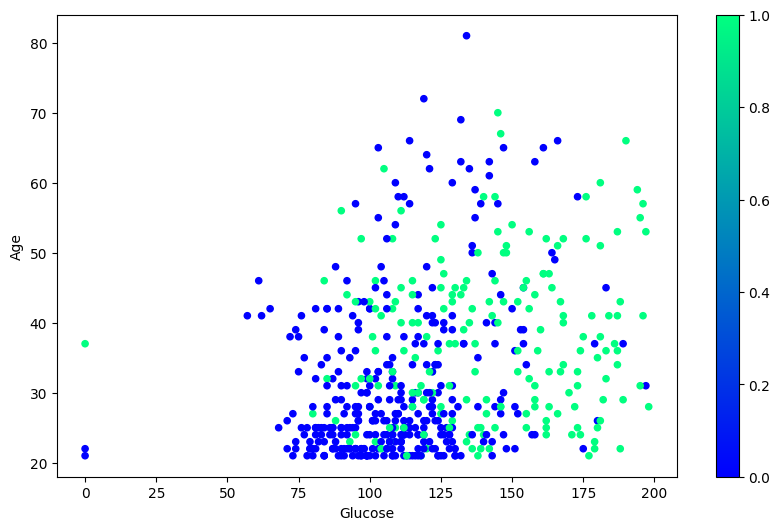

In [9]:
X_train.plot.scatter(x='Glucose', y='Age', c=y_train, cmap='winter', figsize=(10,6));

# kNN (k-найближчі сусіди)

## kNN вручну

Нехай K=5 і нам потрібно визначити клас нового об'єкта.

In [10]:
K = 5

Визначаємо дані.

In [11]:
new_object = [1,2,3]
train_objects = np.random.randn(100,3)

Визначимо мітки класів у навчальному наборі.

In [12]:
train_lables = np.random.choice([1,2,3], size=100)

In [13]:
train_lables

array([2, 3, 1, 3, 2, 3, 2, 2, 1, 1, 3, 1, 3, 2, 1, 3, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 3, 1, 2, 2, 3, 2, 3, 2, 3, 2, 2, 1, 1, 1, 2, 3,
       2, 2, 3, 1, 3, 2, 2, 1, 3, 2, 3, 3, 1, 3, 2, 3, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 3, 2, 2, 1, 2, 3, 2, 1, 3, 1, 3,
       1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2])

Знаходимо відстань Мінковського від усіх наших об'єктів до нового.

In [14]:
distances = [np.sqrt(np.sum((obj - new_object)**2)) for obj in train_objects]

Відранжуємо відстані та знайдемо К найближчих до нового об'єкта. Для початку знайдемо індекси цих топ К найближчих сусідів.

In [15]:
top_k_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:K]

In [16]:
top_k_indices

[61, 12, 0, 69, 28]

Подивимось, які відстані мають найближчі об'єкти.

In [17]:
np.array(distances)[top_k_indices]

array([1.2696793 , 2.09750078, 2.16692496, 2.31623578, 2.56450393])

І виведемо, які класи у найближчих об'єктів:

In [18]:
top_k_classes = np.array(train_lables)[top_k_indices]
top_k_classes

array([1, 3, 2, 3, 3])

In [19]:
unique, counts = np.unique(top_k_classes, return_counts=True)

In [22]:
display(dict(zip(unique, counts)))

{np.int64(1): np.int64(1), np.int64(2): np.int64(1), np.int64(3): np.int64(3)}

Отже, найчастотніший у відповіді клас - це і буде клас нового об'єкта.

## kNN з sklearn

За замовчуванням у kNN використовується відстань Мінковського p=2 (вона ж - евклідова відстань):
https://en.wikipedia.org/wiki/Minkowski_distance

Підберемо оптимальну кількість сусідів.

In [23]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [24]:
knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_, knn_gs.best_score_)

{'n_neighbors': np.int64(8)} 0.7802007615091726


In [25]:
knn_gs.best_estimator_

KNeighborsClassifier(n_neighbors=np.int64(8))

In [26]:
knn_best = knn_gs.best_estimator_

Два способи, як можемо відобразити decision boundary (межу прийняття рішень):

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


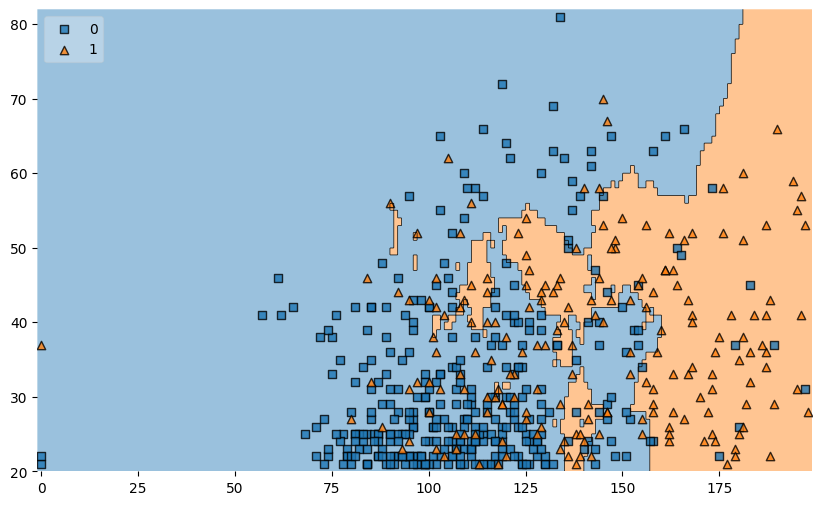

In [27]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,6))
plot_decision_regions(X_train.values, y_train.values, clf=knn_best, legend=2);

In [28]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    plt.figure(figsize=(10,6))
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

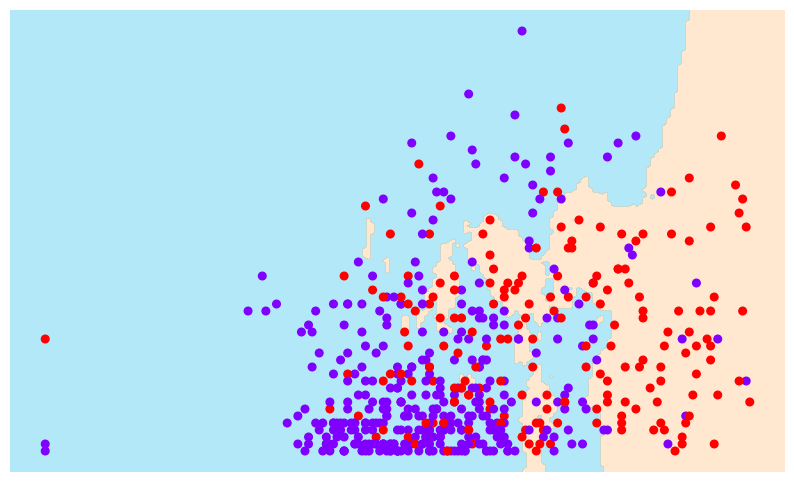

In [29]:
visualize_classifier(knn_best, X_train.values, y_train.values);

In [30]:
y_test_pred_proba = knn_best.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [31]:
y_test_pred_proba[:4]

array([[0.625, 0.375],
       [0.75 , 0.25 ],
       [0.25 , 0.75 ],
       [0.5  , 0.5  ]])

In [32]:
threshold = 0.4
y_pred = np.where(y_test_pred_proba[:,1]>threshold, 1,0)

In [33]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7651    0.7600    0.7625       150
           1     0.5610    0.5679    0.5644        81

    accuracy                         0.6926       231
   macro avg     0.6630    0.6640    0.6635       231
weighted avg     0.6935    0.6926    0.6931       231



In [34]:
def get_report(model, X_test, y_true):
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

In [35]:
get_report(knn_best, X_train, y_train)

              precision    recall  f1-score   support

           0     0.8040    0.9257    0.8606       350
           1     0.8060    0.5775    0.6729       187

    accuracy                         0.8045       537
   macro avg     0.8050    0.7516    0.7667       537
weighted avg     0.8047    0.8045    0.7952       537



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [36]:
get_report(knn_best, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7384    0.8467    0.7888       150
           1     0.6102    0.4444    0.5143        81

    accuracy                         0.7056       231
   macro avg     0.6743    0.6456    0.6516       231
weighted avg     0.6934    0.7056    0.6926       231



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
